In [1]:
from timing_enviroment import *
from pprint import pprint
from methods import *

# Presentación del ambiente


In [2]:
timing = SideChannel_Game(plot= True)
s = timing.estado_inicial
s

''

In [3]:
# Las transiciones posibles para una acción son las posibles letras que se le pueden concatenar.
acciones = timing.acciones_aplicables(s)
transiciones = [timing.transicion(s,i) for i in acciones ]
print(list(zip(acciones, transiciones)))

[(0, 'A'), (1, 'B'), (2, 'C'), (3, 'D'), (4, 'E'), (5, 'F'), (6, 'G'), (7, 'H'), (8, 'I'), (9, 'J'), (10, 'K'), (11, 'L'), (12, 'M'), (13, 'N'), (14, 'O'), (15, 'P'), (16, 'Q'), (17, 'R'), (18, 'S'), (19, 'T'), (20, 'U'), (21, 'V'), (22, 'W'), (23, 'X'), (24, 'Y'), (25, 'Z')]


In [4]:
# El caracter retornará verdadero si aprueba el test de contraseña.
s1 = "MAL"
s2 = "BIEN"
s3 = "ABC"
print(timing.test_objetivo(s1) , timing.test_objetivo(s2) , timing.test_objetivo(s3))

False False True


# Evaluación de los métodos:
## Problemas de la implementación de los métodos:
1. Para implementar el problema como el problema de reconstruir el password mediante un arbol se tuvo el problema de que al intentar construir los pesos de las aristas la solución no converge con muestras menores a 5.000.000 iteraciones, por lo que construir un arbol en este problema no es viable y el problema se convierte en un problema de un entorno completamente observable.
32. Los mejores algoritmos fueron tanto backtracking como greedy search, siendo el mejor greedy search. Sin embargo el algoritmo de greedy search puede fallar.

# Implementación de greedy search o busqueda avara

calculando resultados...


100%|██████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:23<00:00,  1.13it/s]


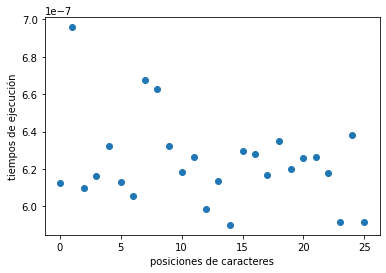

[(6.123583316802979e-07, 'A'),
 (6.957719326019287e-07, 'B'),
 (6.100049018859864e-07, 'C'),
 (6.161959171295166e-07, 'D'),
 (6.320433616638183e-07, 'E'),
 (6.131284236907959e-07, 'F'),
 (6.056277751922607e-07, 'G'),
 (6.673758029937744e-07, 'H'),
 (6.626369953155517e-07, 'I'),
 (6.322851181030273e-07, 'J'),
 (6.185355186462403e-07, 'K'),
 (6.262376308441162e-07, 'L'),
 (5.984466075897216e-07, 'M'),
 (6.136283874511719e-07, 'N'),
 (5.900852680206299e-07, 'O'),
 (6.29765510559082e-07, 'P'),
 (6.281852722167968e-07, 'Q'),
 (6.168160438537598e-07, 'R'),
 (6.347155570983886e-07, 'S'),
 (6.199502944946289e-07, 'T'),
 (6.261148452758789e-07, 'U'),
 (6.262834072113037e-07, 'V'),
 (6.177132129669189e-07, 'W'),
 (5.916411876678467e-07, 'X'),
 (6.379978656768799e-07, 'Y'),
 (5.917603969573974e-07, 'Z')]


In [11]:
def greedy_search(problema, iteraciones):                                                                                      
    """                                                                                                                        
    Greedy search aplicado a la euristica definida como que el que mas se                                                      
    demora es mejor.                                                                                                           
    """                                                                                                                        
    estado_inicial = problema.estado_inicial                                                                                   
    tam_llave = problema.crackear_longitud()                                                                                   
    solved = False                                                                                                             
    while(not solved):                                                                                                         
        mejor_accion = np.argmax(problema.get_euristicas_tiempo(estado_inicial , tam_llave, iteraciones))                      
        estado_inicial = problema.transicion(estado_inicial , mejor_accion)                                                    
        print(estado_inicial)                                                                                                  
        solved = problema.test_objetivo(estado_inicial)                                                                        
    print(f"Le pegó! la llave es {estado_inicial}")                                                                            
    return(estado_inicial)

# Implementación de la Euristica
euristicas = timing.get_euristicas_tiempo("A" ,3 , 1000000)
caracteres = [chr(i) for i in range(ord("A") , ord("Z")+1)]
lista = list(zip(euristicas, caracteres))
pprint(lista)
# Se puede notar que la letra que mas se demora es la "B"

# Implementación de greedy search con restriccion de la longitud
## El algoritmo de greedy search presenta el siguiente problema: 
- Si en algún momento toma una desición errada, no es posible saber si la tomó y el algoritmo será infinito
## Algoritmo de greedy search delimitado
- La idea es implementar el mismo algoritmo con la diferencia de que tiene en cuenta si se equivocó, mirando si la longitud es mayor a la inicial

In [6]:
def limited_greedy_search(problema, iteraciones):                                                                              
    """                                                                                                                        
    Limited Greedy search aplicado a la euristica definida como que el que mas                                                 
    se demora es mejor.                                                                                                        
    """                                                                                                                        
    estado_inicial = problema.estado_inicial                                                                                   
    tam_llave = problema.crackear_longitud()                                                                                   
    solved = False                                                                                                             
    while(not solved):                                                                                                         
        mejor_accion = np.argmax(problema.get_euristicas_tiempo(estado_inicial , tam_llave, iteraciones))                      
        estado_inicial = problema.transicion(estado_inicial , mejor_accion)                                                    
        print(estado_inicial)                                                                                                  
        solved = problema.test_objetivo(estado_inicial)                                                                        
        if(len(estado_inicial) > tam_llave):                                                                                   
            print("Pailas, se equivocó")                                                                                       
            return(False)                                                                                                      
    print(f"Le pegó! la llave es {estado_inicial}")                                                                            
    return(estado_inicial)   

# Implementación del algoritmo de backtracking

In [7]:
def backtracking(problema, iteraciones):                                                                                       
    """                                                                                                                        
    Implementación del algoritmo de backtracking aplicado al problema de un                                                    
    ataque a la comparación trivial via Timming Attack.                                                                        
    """                                                                                                                        
    estado_inicial = problema.estado_inicial
    tam_llave = problema.crackear_longitud()
    solved = False
    acciones = problema.get_transiciones(estado_inicial)
    while(not solved):
        transicion_aleatoria = random.choice(acciones)
        print(acciones)
        print(f"se elegio la opcion {transicion_aleatoria}")
        if(problema.validar_estado(transicion_aleatoria, iteraciones)):
            estado_inicial = transicion_aleatoria
            # Reseteo las acciones
            acciones = problema.get_transiciones(estado_inicial)
        else:
            # Si la acción que tomé está errada simplemente la elimino y sigo
            # buscando
            acciones.remove(transicion_aleatoria)
        solved = problema.test_objetivo(estado_inicial)
        # Si no hay acciones pailas
        if(len(acciones)==0):
            print("no funcionó")
            return(False)
    return(estado_inicial)

# Implementación del algoritmo de bruteforcing como prueba:

In [14]:
def bruteforcing_(problema):
    """Este problema es equivalente a mirar todos los nodos de la raiz"""
    tam_llave = problema.crackear_longitud()
    mystring = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    combos = [''.join(i) for i in product(mystring, repeat = tam_llave)]
    for i in combos:
        if(problema.test_objetivo(i)):
            print(f"la llave es {i}")
            return(i)
    return(False)

# Pruebas

crackeando longitud...


100%|██████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 14.93it/s]


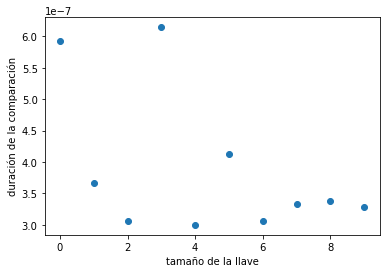

la longitud de la llave es 3  
calculando resultados...


100%|██████████████████████████████████████████████████████████████████████████████████████████| 26/26 [06:56<00:00, 16.03s/it]


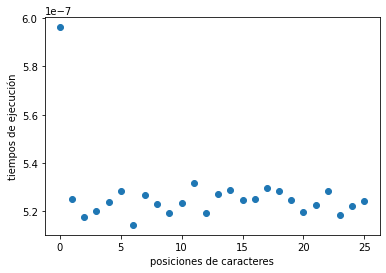

A
calculando resultados...


100%|██████████████████████████████████████████████████████████████████████████████████████████| 26/26 [07:33<00:00, 17.44s/it]


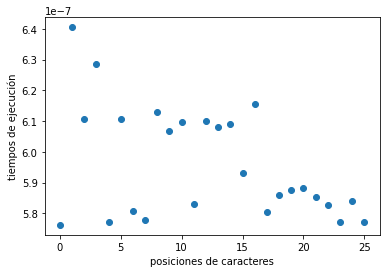

AB
calculando resultados...


100%|██████████████████████████████████████████████████████████████████████████████████████████| 26/26 [08:04<00:00, 18.65s/it]


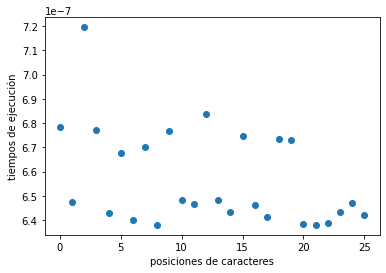

ABC
Le pegó! la llave es ABC


'ABC'

In [13]:
# Greedy search limitado (si no se limita la ejecución es infinita)
limited_greedy_search(timing, 20_000_000)

crackeando longitud...


100%|██████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 15.41it/s]


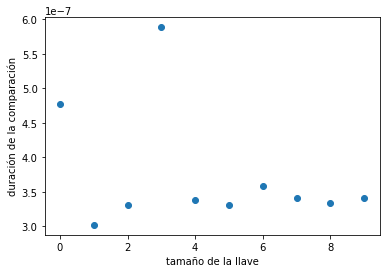

la longitud de la llave es 3  
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
se elegio la opcion K
crackeando longitud...


100%|██████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 16.20it/s]


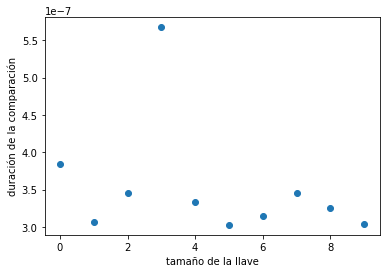

la longitud de la llave es 3  
calculando resultados...


100%|█████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 855.15it/s]


calculando resultados...


100%|████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 1002.91it/s]


calculando resultados...


100%|█████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 745.12it/s]


['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
se elegio la opcion L
crackeando longitud...


100%|██████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 14.43it/s]


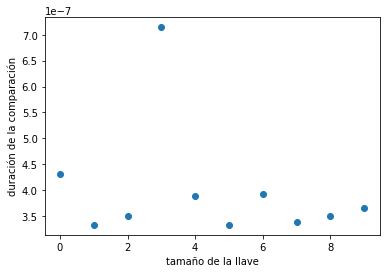

la longitud de la llave es 3  
calculando resultados...


100%|█████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 990.70it/s]


calculando resultados...


100%|█████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 847.98it/s]


calculando resultados...


100%|█████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 902.23it/s]


['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
se elegio la opcion M
crackeando longitud...


100%|██████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 15.08it/s]


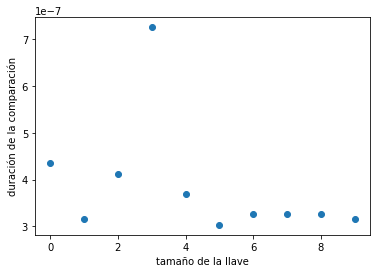

la longitud de la llave es 3  
calculando resultados...


100%|█████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 825.80it/s]


calculando resultados...


100%|█████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 721.38it/s]


calculando resultados...


100%|█████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 638.51it/s]


['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
se elegio la opcion D
crackeando longitud...


100%|██████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 15.80it/s]


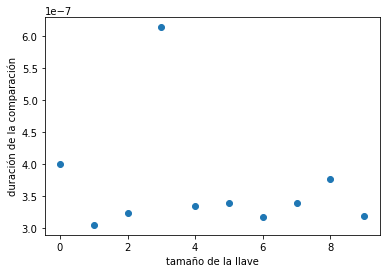

la longitud de la llave es 3  
calculando resultados...


100%|█████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 825.70it/s]


calculando resultados...


100%|█████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 945.17it/s]


calculando resultados...


100%|█████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 886.93it/s]


['A', 'B', 'C', 'E', 'F', 'G', 'H', 'I', 'J', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
se elegio la opcion B
crackeando longitud...


100%|██████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 14.05it/s]


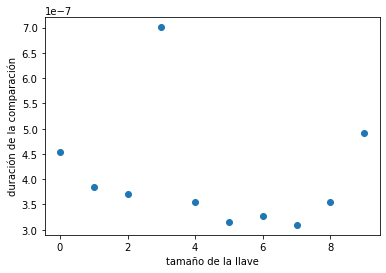

la longitud de la llave es 3  
calculando resultados...


100%|█████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 848.97it/s]


calculando resultados...


100%|█████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 813.72it/s]


calculando resultados...


100%|█████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 859.07it/s]


['A', 'C', 'E', 'F', 'G', 'H', 'I', 'J', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
se elegio la opcion F
crackeando longitud...


100%|██████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 15.18it/s]


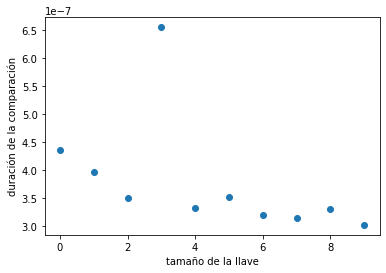

la longitud de la llave es 3  
calculando resultados...


100%|████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 1082.49it/s]


calculando resultados...


100%|████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 1044.15it/s]


calculando resultados...


100%|█████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 770.97it/s]


['A', 'C', 'E', 'G', 'H', 'I', 'J', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
se elegio la opcion R
crackeando longitud...


100%|██████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 13.76it/s]


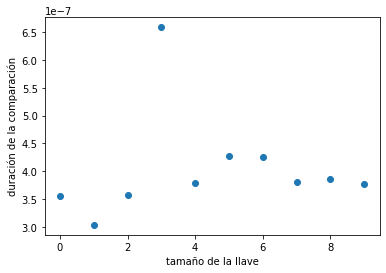

la longitud de la llave es 3  
calculando resultados...


100%|█████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 837.67it/s]


calculando resultados...


100%|█████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 696.80it/s]


calculando resultados...


100%|█████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 773.86it/s]


['A', 'C', 'E', 'G', 'H', 'I', 'J', 'N', 'O', 'P', 'Q', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
se elegio la opcion Q
crackeando longitud...


100%|██████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 13.56it/s]


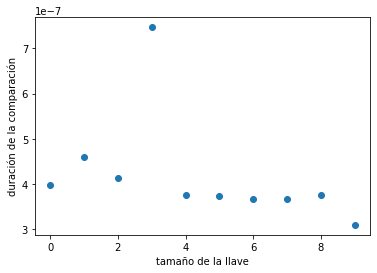

la longitud de la llave es 3  
calculando resultados...


100%|█████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 867.69it/s]


calculando resultados...


100%|█████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 820.35it/s]


calculando resultados...


100%|█████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 826.03it/s]


['A', 'C', 'E', 'G', 'H', 'I', 'J', 'N', 'O', 'P', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
se elegio la opcion C
crackeando longitud...


100%|██████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 15.45it/s]


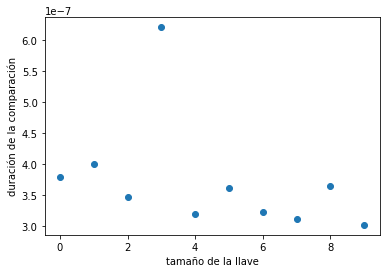

la longitud de la llave es 3  
calculando resultados...


100%|█████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 985.70it/s]


calculando resultados...


100%|█████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 884.49it/s]


calculando resultados...


100%|█████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 855.75it/s]


['A', 'E', 'G', 'H', 'I', 'J', 'N', 'O', 'P', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
se elegio la opcion S
crackeando longitud...


100%|██████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 15.73it/s]


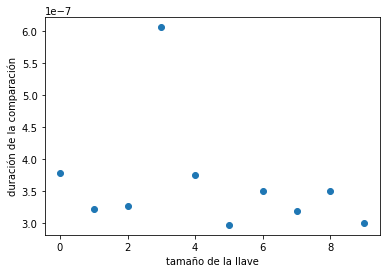

la longitud de la llave es 3  
calculando resultados...


100%|████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 1077.31it/s]


calculando resultados...


100%|████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 1233.01it/s]


calculando resultados...


100%|████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 1241.94it/s]


['A', 'E', 'G', 'H', 'I', 'J', 'N', 'O', 'P', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
se elegio la opcion H
crackeando longitud...


100%|██████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 13.74it/s]


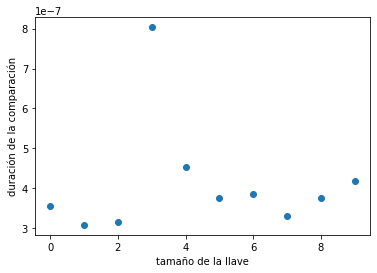

la longitud de la llave es 3  
calculando resultados...


100%|█████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 904.31it/s]


calculando resultados...


100%|█████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 781.72it/s]


calculando resultados...


100%|█████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 802.80it/s]


['A', 'E', 'G', 'I', 'J', 'N', 'O', 'P', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
se elegio la opcion E
crackeando longitud...


100%|██████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 13.34it/s]


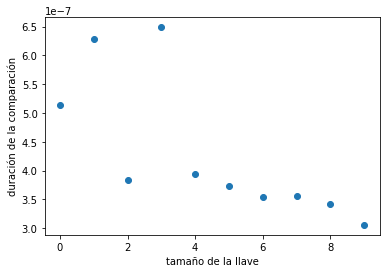

la longitud de la llave es 3  
calculando resultados...


100%|█████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 917.64it/s]


calculando resultados...


100%|█████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 736.05it/s]


calculando resultados...


100%|█████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 876.02it/s]


['A', 'G', 'I', 'J', 'N', 'O', 'P', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
se elegio la opcion V
crackeando longitud...


100%|██████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 14.57it/s]


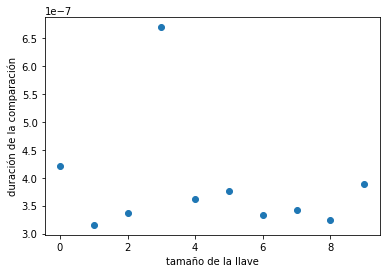

la longitud de la llave es 3  
calculando resultados...


100%|█████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 867.47it/s]


calculando resultados...


100%|█████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 923.71it/s]


calculando resultados...


100%|█████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 854.05it/s]


['A', 'G', 'I', 'J', 'N', 'O', 'P', 'T', 'U', 'W', 'X', 'Y', 'Z']
se elegio la opcion G
crackeando longitud...


100%|██████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 14.06it/s]


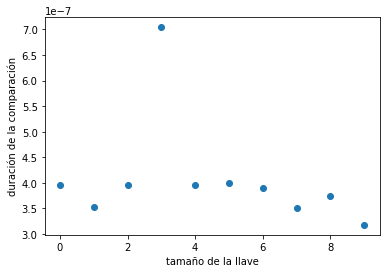

la longitud de la llave es 3  
calculando resultados...


100%|█████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 927.66it/s]


calculando resultados...


100%|█████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 674.87it/s]


calculando resultados...


100%|█████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 822.74it/s]


['A', 'I', 'J', 'N', 'O', 'P', 'T', 'U', 'W', 'X', 'Y', 'Z']
se elegio la opcion J
crackeando longitud...


100%|██████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 14.80it/s]


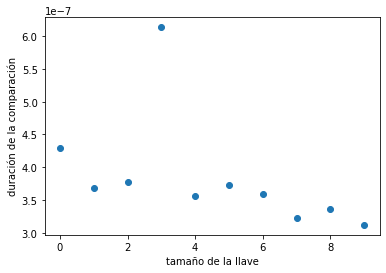

la longitud de la llave es 3  
calculando resultados...


100%|████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 1075.39it/s]


calculando resultados...


100%|████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 1007.81it/s]


calculando resultados...


100%|█████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 822.73it/s]


['A', 'I', 'N', 'O', 'P', 'T', 'U', 'W', 'X', 'Y', 'Z']
se elegio la opcion X
crackeando longitud...


100%|██████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 15.05it/s]


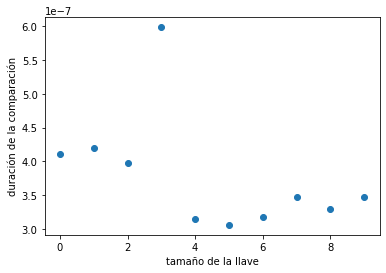

la longitud de la llave es 3  
calculando resultados...


100%|█████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 825.21it/s]


calculando resultados...


100%|█████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 752.05it/s]


calculando resultados...


100%|█████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 954.47it/s]


['A', 'I', 'N', 'O', 'P', 'T', 'U', 'W', 'Y', 'Z']
se elegio la opcion O
crackeando longitud...


100%|██████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 15.43it/s]


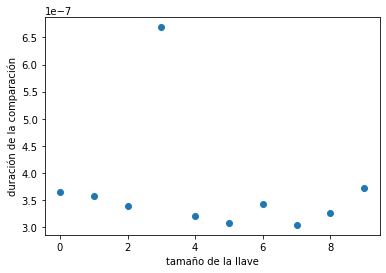

la longitud de la llave es 3  
calculando resultados...


100%|█████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 904.12it/s]


calculando resultados...


100%|████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 1006.52it/s]


calculando resultados...


100%|█████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 893.33it/s]


['A', 'I', 'N', 'P', 'T', 'U', 'W', 'Y', 'Z']
se elegio la opcion Z
crackeando longitud...


100%|██████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 14.97it/s]


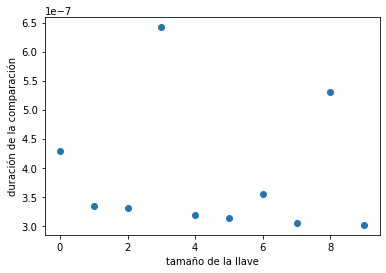

la longitud de la llave es 3  
calculando resultados...


100%|████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 1066.41it/s]


calculando resultados...


100%|█████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 944.19it/s]


calculando resultados...


100%|█████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 817.30it/s]


['A', 'I', 'N', 'P', 'T', 'U', 'W', 'Y']
se elegio la opcion A
crackeando longitud...


100%|██████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 14.98it/s]


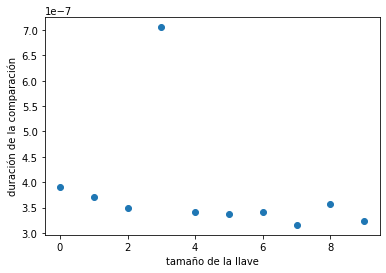

la longitud de la llave es 3  
calculando resultados...


100%|█████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 887.09it/s]


calculando resultados...


100%|█████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 741.36it/s]


calculando resultados...


100%|█████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 899.20it/s]


['I', 'N', 'P', 'T', 'U', 'W', 'Y']
se elegio la opcion N
crackeando longitud...


100%|██████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 14.67it/s]


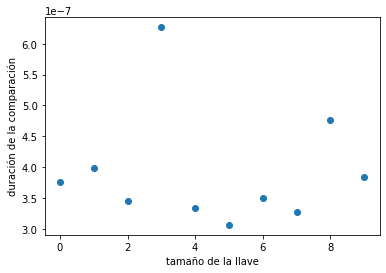

la longitud de la llave es 3  
calculando resultados...


100%|█████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 832.31it/s]


calculando resultados...


100%|█████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 747.51it/s]


calculando resultados...


100%|█████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 873.89it/s]


['I', 'P', 'T', 'U', 'W', 'Y']
se elegio la opcion I
crackeando longitud...


100%|██████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 15.12it/s]


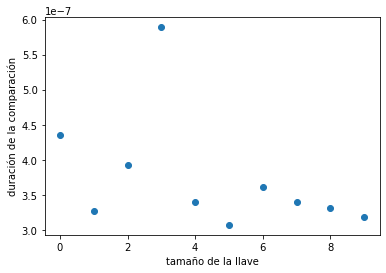

la longitud de la llave es 3  
calculando resultados...


100%|█████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 881.14it/s]


calculando resultados...


100%|█████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 894.72it/s]


calculando resultados...


100%|█████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 950.00it/s]


['P', 'T', 'U', 'W', 'Y']
se elegio la opcion P
crackeando longitud...


100%|██████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 14.31it/s]


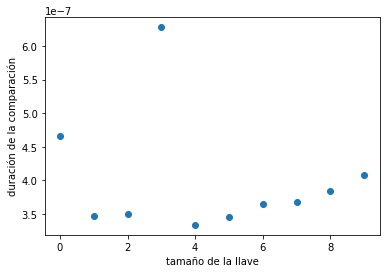

la longitud de la llave es 3  
calculando resultados...


100%|█████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 916.19it/s]


calculando resultados...


100%|█████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 769.98it/s]


calculando resultados...


100%|█████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 809.58it/s]


['T', 'U', 'W', 'Y']
se elegio la opcion W
crackeando longitud...


100%|██████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 15.43it/s]


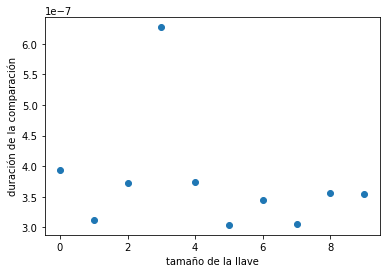

la longitud de la llave es 3  
calculando resultados...


100%|████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 1063.17it/s]


calculando resultados...


100%|████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 1113.23it/s]


calculando resultados...


100%|█████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 896.41it/s]


['T', 'U', 'Y']
se elegio la opcion U
crackeando longitud...


100%|██████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 14.96it/s]


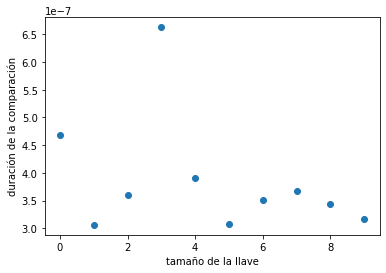

la longitud de la llave es 3  
calculando resultados...


100%|█████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 860.81it/s]


calculando resultados...


100%|████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 1057.57it/s]


calculando resultados...


100%|█████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 806.87it/s]


['T', 'Y']
se elegio la opcion T
crackeando longitud...


100%|██████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 14.78it/s]


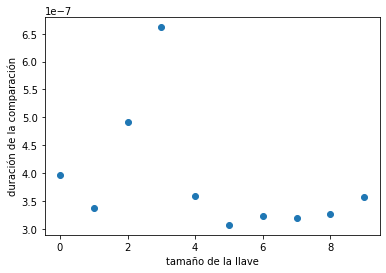

la longitud de la llave es 3  
calculando resultados...


100%|████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 1003.99it/s]


calculando resultados...


100%|█████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 990.96it/s]


calculando resultados...


100%|█████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 846.85it/s]


['Y']
se elegio la opcion Y
crackeando longitud...


100%|██████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 15.37it/s]


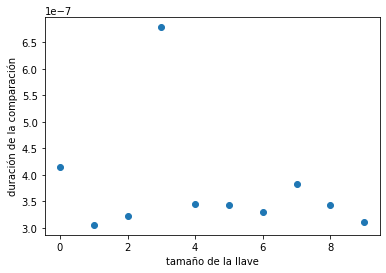

la longitud de la llave es 3  
calculando resultados...


100%|█████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 968.20it/s]


calculando resultados...


100%|█████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 937.77it/s]


calculando resultados...


100%|█████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 917.33it/s]

no funcionó


False

In [14]:
backtracking(timing, 1000)

# Implementación del algoritmo de fuerza bruta

crackeando longitud...


100%|██████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 14.77it/s]


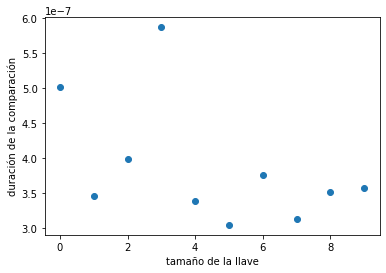

la longitud de la llave es 3  
la llave es ABC


'ABC'

In [17]:
def bruteforcing_(problema):
    """Este problema es equivalente a mirar todos los nodos de la raiz"""
    tam_llave = problema.crackear_longitud()
    mystring = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    combos = [''.join(i) for i in product(mystring, repeat = tam_llave)]
    for i in combos:
        if(problema.test_objetivo(i)):
            print(f"la llave es {i}")
            return(i)
    return(False)

bruteforcing_(timing)

# Conclusiones:
1. El mejor algoritmo para crackear llaves muy cortas es fuerza bruta
2. El mejor algoritmo para crackear llaves mayores a 8 caracteres es el de busqueda avara
3. El algoritmo de backtracking no es bueno para este problema
4. Entre mayor sea el tamaño de la llave, mayor deberá ser el sampleo, además, trabajar con el tiempo de las cpu es complicado puesto que cualquier movimiento en el computador puede alterar los resultados